In [1]:
from deim_wrapper import list_models, load_model

In [2]:
list_models()

['deim_hgnetv2_n',
 'deim_hgnetv2_s',
 'deim_hgnetv2_m',
 'deim_hgnetv2_l',
 'deim_hgnetv2_x']

In [3]:
model = load_model("deim_hgnetv2_s", 
                   checkpoint="/home/dnth/Desktop/deim-wrapper/outputs/deim_hgnetv2_s_coco_cells/last.pth",
                   class_names=["cell", "platelet", "red_blood_cell", "white_blood_cell"])

2025-03-09 23:48:14.428 | INFO     | deim_wrapper.predictor:__init__:41 - Initializing Predictor with device=auto
2025-03-09 23:48:14.546 | INFO     | deim_wrapper.predictor:__init__:60 - Auto-selected device: cuda
2025-03-09 23:48:14.546 | INFO     | deim_wrapper.predictor:__init__:68 - Using custom checkpoint: /home/dnth/Desktop/deim-wrapper/outputs/deim_hgnetv2_s_coco_cells/last.pth
2025-03-09 23:48:14.549 | DEBUG    | deim_wrapper.predictor:__init__:90 - Successfully initialized distributed environment
2025-03-09 23:48:14.550 | INFO     | deim_wrapper.predictor:__init__:101 - Loading configuration from model name: deim_hgnetv2_s
2025-03-09 23:48:14.888 | WARNING  | deim_wrapper.predictor:__init__:122 - Could not load checkpoint with non-strict loading: Error(s) in loading state_dict for DEIM:
	size mismatch for decoder.denoising_class_embed.weight: copying a param with shape torch.Size([5, 256]) from checkpoint, the shape in current model is torch.Size([81, 256]).
	size mismatch fo

In [4]:
result = model.predict("/home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00099_jpg.rf.d60344d65fdf49563ec54664b0e79f70.jpg", 
                       visualize=True)

2025-03-09 23:48:15.095 | DEBUG    | deim_wrapper.predictor:predict:260 - Loading image from path: /home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00099_jpg.rf.d60344d65fdf49563ec54664b0e79f70.jpg
2025-03-09 23:48:15.406 | DEBUG    | deim_wrapper.predictor:predict:300 - Prediction complete. Found 14 objects
2025-03-09 23:48:15.406 | DEBUG    | deim_wrapper.predictor:predict:303 - Generating visualization


In [5]:
result

{'boxes': array([[218.03879  , 227.57472  , 375.92892  , 344.697    ],
        [430.8444   ,  16.036835 , 537.15125  , 116.52855  ],
        [503.99542  , 123.84088  , 616.40234  , 236.8682   ],
        [541.4465   , 366.3272   , 638.2997   , 462.80566  ],
        [384.69724  ,  63.929974 , 421.1981   , 101.82325  ],
        [142.77808  , 156.24982  , 257.60153  , 247.36584  ],
        [ 30.628658 ,   0.7490659, 135.70102  ,  80.12392  ],
        [376.38373  , 187.7942   , 478.0812   , 288.53186  ],
        [378.72333  , 405.59253  , 497.1945   , 480.08365  ],
        [535.19354  ,   1.3883686, 634.78827  ,  78.99466  ],
        [ 48.12105  , 318.7662   , 139.50952  , 418.00946  ],
        [124.98283  , 216.0378   , 222.09396  , 325.60156  ],
        [334.61987  , 151.43958  , 368.76416  , 186.03064  ],
        [  1.0445023, 227.08781  ,  50.792114 , 334.10287  ]],
       dtype=float32),
 'labels': array([3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2]),
 'scores': array([0.831828  , 0.77741

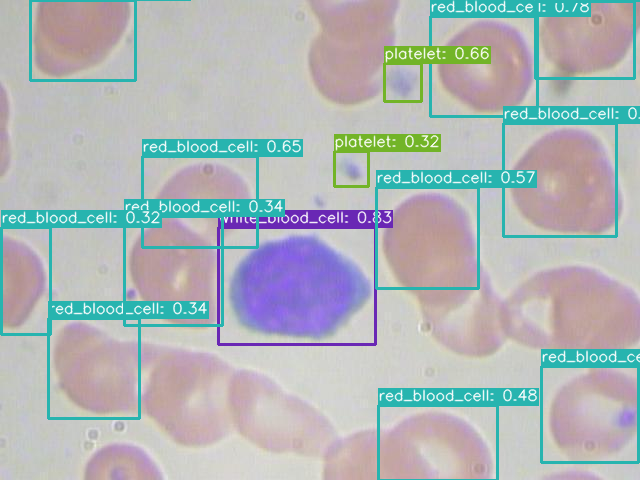

In [6]:
result["visualization"]

In [7]:
# Load folder of images
import glob
image_paths = glob.glob('/home/dnth/Desktop/DEIM/dataset/images/test/*.jpg')

image_paths



['/home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00062_jpg.rf.d5f527bc75eb023b530cc25a76268d64.jpg',
 '/home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00254_jpg.rf.6766c79666f2bde5d4b5bbd988714a9e.jpg',
 '/home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00044_jpg.rf.76fca35f8f8f8310472b33f2fce3013a.jpg',
 '/home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00134_jpg.rf.dc3431fd875fa36eafd1e72c6218d691.jpg',
 '/home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00090_jpg.rf.2e7c0319b7e86fb52acc2e425148eb58.jpg',
 '/home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00302_jpg.rf.73c92ceaf01fd6a97da8c9653ee4b0e2.jpg',
 '/home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00120_jpg.rf.148c37b4a13a538157509f006b83b843.jpg',
 '/home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00266_jpg.rf.7ecb7f28fd7c45a4f129443425e1dd9b.jpg',
 '/home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00369_jpg.rf.86fbe6c7bdf7777bfb56e3960016c15d.jpg',
 '/home/dnth/Deskto

In [14]:
results = model.predict_batch(image_paths[0:6], conf_threshold=0.2, visualize=True)

2025-03-09 23:51:04.845 | INFO     | deim_wrapper.predictor:predict_batch:338 - Processing batch of 6 images with batch_size=16
2025-03-09 23:51:04.845 | DEBUG    | deim_wrapper.predictor:predict_batch:351 - Loading image 0 from path: /home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00062_jpg.rf.d5f527bc75eb023b530cc25a76268d64.jpg
2025-03-09 23:51:04.851 | DEBUG    | deim_wrapper.predictor:predict_batch:351 - Loading image 1 from path: /home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00254_jpg.rf.6766c79666f2bde5d4b5bbd988714a9e.jpg
2025-03-09 23:51:04.858 | DEBUG    | deim_wrapper.predictor:predict_batch:351 - Loading image 2 from path: /home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00044_jpg.rf.76fca35f8f8f8310472b33f2fce3013a.jpg
2025-03-09 23:51:04.864 | DEBUG    | deim_wrapper.predictor:predict_batch:351 - Loading image 3 from path: /home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00134_jpg.rf.dc3431fd875fa36eafd1e72c6218d691.jpg
2025-03-09 23:51:04.872 

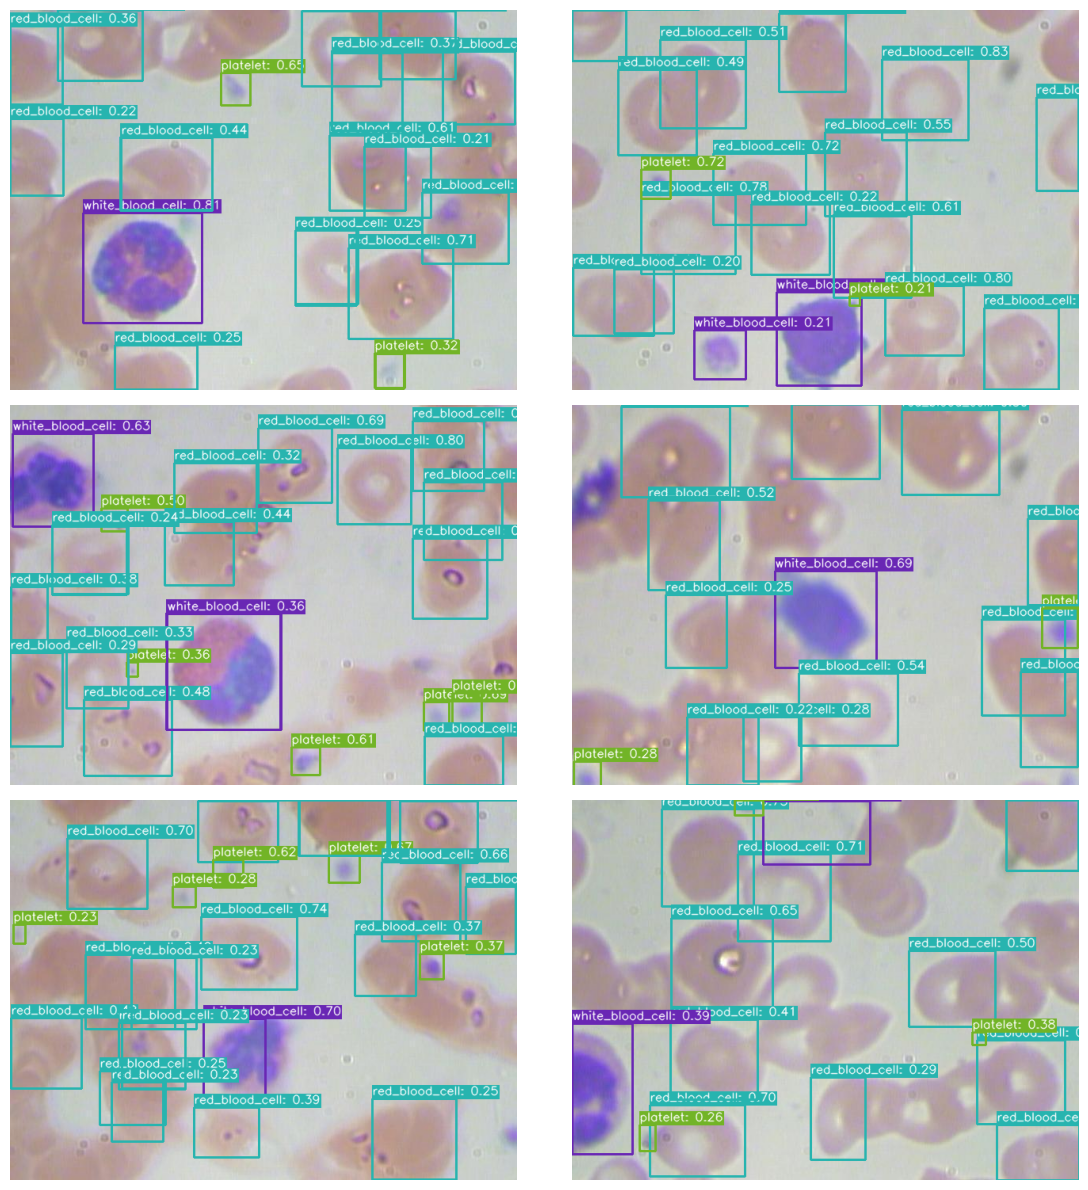

In [15]:
# Plot results in a grid
import matplotlib.pyplot as plt
import math

n_cols = 2
n_rows = math.ceil(len(results) / n_cols)
plt.figure(figsize=(12, 4*n_rows))  

for i, result in enumerate(results):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(result["visualization"])
    plt.axis('off')
plt.tight_layout()  
plt.show()